First & Second Name:

Student ID:

Note I: Each section is worth 50 points. Each question is worth 5 points, and your implementation is worth 30 points in total. (5 × 4 + 30 = 50) × 2 = 100.

Note II: For each section, your model (agent) can converge. By achieving convergence in each section, you will earn an additional **5 points** per section. Alternatively, if your agent demonstrates an incremental average return, that will suffice.

# Section One

### Develop the model of nueral network for training agent.

In this section, you’ll embark on implementing a Deep Q-Network (DQN) agent from scratch, one of the fundamental algorithms in deep reinforcement learning. DQN revolutionized the field by successfully combining deep neural networks with Q-learning, enabling agents to learn directly from high-dimensional sensory inputs. You’ll build each component systematically - starting with the neural network architecture that approximates Q-values, then implementing the experience replay buffer that breaks correlations in training data, followed by the epsilon-greedy policy for balancing exploration and exploitation, and finally bringing it all together in the DQN agent class. This hands-on implementation will deepen your understanding of how value-based reinforcement learning algorithms work under the hood.
Below is the schema for DQN implementation

![image-3](https://www.researchgate.net/publication/344238597/figure/fig4/AS:935663859937283@1600091056689/DQN-training-process.png)

The CartPole-v1 environment serves as your testing ground - a classic control problem where an agent must balance a pole on a moving cart. Through this implementation, you’ll gain practical experience with key concepts like target networks for stable learning, batch sampling from replay memory, and the temporal difference learning update rule. Pay special attention to how each component interacts with others: how the neural network processes states to output Q-values, how the replay buffer stores and samples experiences, and how the epsilon-greedy policy uses these Q-values to select actions. The visualization at the end will show your agent’s learning progress across multiple random seeds, demonstrating the effectiveness of your implementation. The conceptual questions following the implementation will help solidify your understanding of where DQN fits in the broader landscape of reinforcement learning algorithms.

# Implement Models

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
import os
import torch.nn as nn
import torch.optim as optim
import torch
import collections
import random
from collections import namedtuple
import numpy as np
import tqdm
import collections

Transition = collections.namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))
class FCModel(nn.Module):
    """ Implement a dense nn for using on QNetwork"""

    def __init__(self, input_size, output_size):
        #####################################################################
        # TODO:
        # 1) Creat a nueral network (dense) for getting with input_size and return output_size

        # comment the line below to test your code
        raise NotImplementedError(" No filter has implemented to the images")
        #####################################################################

    def forward(self, inputs):
        #####################################################################
        # TODO:
        # 2) Implement forward function

        # comment the line below to test your code
        raise NotImplementedError(" No filter has implemented to the images")
        #####################################################################
    pass

# QNetwork class
class QNetwork:
    """ Implement QNetwork for estimate q-values"""
    def __init__(self, env, lr):

        #####################################################################
        # TODO:
        # 3) Implement optimizer
        # 4) Implement suitable lr
        # 5) and self.net which contain a FCModel in it

        # comment the line below to test your code
        raise NotImplementedError(" No filter has implemented to the images")
        #####################################################################

### Develop the replay buffer for adding experiences in buffers.

In [ ]:
# Memory/Replay Buffer class
class ReplayMemory:
    def __init__(self, env, memory_size=50000, burn_in=10000):
        self.memory_size = memory_size
        self.burn_in = burn_in
        self.memory = collections.deque(maxlen=memory_size)
        self.env = env
    
    def __len__(self):
        return len(self.memory)
    
    def sample_batch(self, batch_size=32):
        #####################################################################
        # TODO:
        # 6) Impelement sample batch function to return sample from replay buffer with giben batch size 

        # comment the line below to test your code
        raise NotImplementedError(" No filter has implemented to the images")
        #####################################################################


    def append(self, transition):
        self.memory.append(transition)

    def burn_in_memory(self):
        #####################################################################
        # TODO:
        # 7) Fill the memory with random transitions for burn_in steps
        # the storing should be with Transition nametuple which implemented above

        # comment the line below to test your code
        raise NotImplementedError(" No filter has implemented to the images")
        #####################################################################



### Policy module for selecting best action in given states. (Note: you can add the update_epsilone function to update the epsilone for each iteration)

In [ ]:
class Policy:
    def __init__(self, env, epsilon_start=1.0, epsilon_end=0.05, epsilon_decay=0.995):
        self.env = env
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        
    def select_action(self, state, q_network, training=True):
        #####################################################################
        # TODO:
        # 8) implement select action with epsilon greedy 
        # comment the line below to test your code
        raise NotImplementedError(" No filter has implemented to the images")
        #####################################################################

        return torch.argmax(q_network.net(state)).view(1, 1)
    
    def update_epsilon(self):
        """Decay epsilon"""
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)


### Develop Agent for DQN alghorithm. This module is reponsbile for training, testing, fill the buffer and optimize the learning.

In [ ]:
class DQNAgent:
    def __init__(self, env_name, lr=1e-4, gamma=0.99, batch_size=128, 
                 target_update=10, memory_size=50000, burn_in=10000,
                 epsilon_start=1.0, epsilon_end=0.05, epsilon_decay=0.995):
        
        #####################################################################
        # TODO:
        # 8) inital all element you implemented before like replay buffer, policy etc.

        raise NotImplementedError(" No filter has implemented to the images")
        #####################################################################

    def train(self):
        """Train the agent for one episode"""
        if len(self.memory) < self.burn_in:
            self.memory.burn_in_memory()
            
        state, _ = self.env.reset()

        #####################################################################
        # TODO:
        # 9) Complete training function, you should use optimize_model function 

        raise NotImplementedError(" No filter has implemented to the images")
        #####################################################################

        # Update epsilon
        self.policy.update_epsilon()
        
        return episode_reward, episode_loss / steps if steps > 0 else 0, steps

    def _optimize_model(self):
        """Perform one step of optimization"""
        transitions = self.memory.sample_batch(self.batch_size)
        batch = Transition(*zip(*transitions))
        
        # Compute a mask of non-final states
        non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), 
                                      dtype=torch.bool)
        
        non_final_next_states = torch.cat([s for s in batch.next_state if s is not None])
        state_batch = torch.cat(batch.state)
        action_batch = torch.cat(batch.action)
        reward_batch = torch.cat(batch.reward)
        
        # Compute Q(s_t, a) - the model computes Q(s_t), then we select the columns of actions taken
        state_action_values = self.policy_net.net(state_batch).gather(1, action_batch)
        
        # Compute V(s_{t+1}) for all next states
        next_state_values = torch.zeros(self.batch_size)
        with torch.no_grad():
            next_state_values[non_final_mask] = self.target_net.net(non_final_next_states).max(1)[0]
        
        # Compute the expected Q values
        expected_state_action_values = (next_state_values * self.gamma) + reward_batch
        
        # Compute loss
        criterion = nn.MSELoss()
        loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))
        
        # Optimize the model
        self.policy_net.optimizer.zero_grad()
        loss.backward()

        self.policy_net.optimizer.step()
        
        return loss.item()

    def test(self, render=False):
        """Test the agent on one episode"""
        state, _ = self.env.reset()
        total_reward = 0
        done = False
        
        #####################################################################
        # TODO:
        # 10) Complete training function

        raise NotImplementedError(" No filter has implemented to the images")
        #####################################################################
                
        return total_reward


In [ ]:
# Note: Feels free for adjust andy hyper paramter you want for trainin. Except these: seed, env_name, state_space_size
if __name__ == "__main__":
    env_name = 'CartPole-v1'
    num_episodes_train = 200
    num_episodes_test = 20
    learning_rate = 5e-4 
    
    env = gym.make(env_name)
    action_space_size = env.action_space.n
    state_space_size = 4
    
    num_seeds = 5
    l = num_episodes_train // 10
    res = np.zeros((num_seeds, l))
    gamma = 0.99
    
    for i in tqdm.tqdm(range(num_seeds)):
        reward_means = []
        agent = DQNAgent(env_name, lr=learning_rate, gamma=gamma)
        
        for m in range(num_episodes_train):
            episode_reward, episode_loss, steps = agent.train()
            
            if m % 10 == 0:
                print(f"Episode: {m}")
                
                G = np.zeros(num_episodes_test)
                for k in range(num_episodes_test):
                    g = agent.test()
                    G[k] = g
                
                reward_mean = G.mean()
                reward_sd = G.std()
                print(f"The test reward for episode {m} is {reward_mean} with a standard deviation of {reward_sd}.")
                reward_means.append(reward_mean)
        
        res[i] = np.array(reward_means)
    
    ks = np.arange(l) * 10
    avs = np.mean(res, axis=0)
    maxs = np.max(res, axis=0)
    mins = np.min(res, axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(ks, mins, maxs, alpha=0.1)
    plt.plot(ks, avs, '-o', markersize=1)
    
    plt.xlabel('Episode', fontsize=15)
    plt.ylabel('Avg. Return', fontsize=15)
    plt.title('DQN Performance on CartPole-v1')
    plt.grid(True, alpha=0.3)
    plt.savefig('dqn_performance.png')
    plt.show()

## Answer these questions:

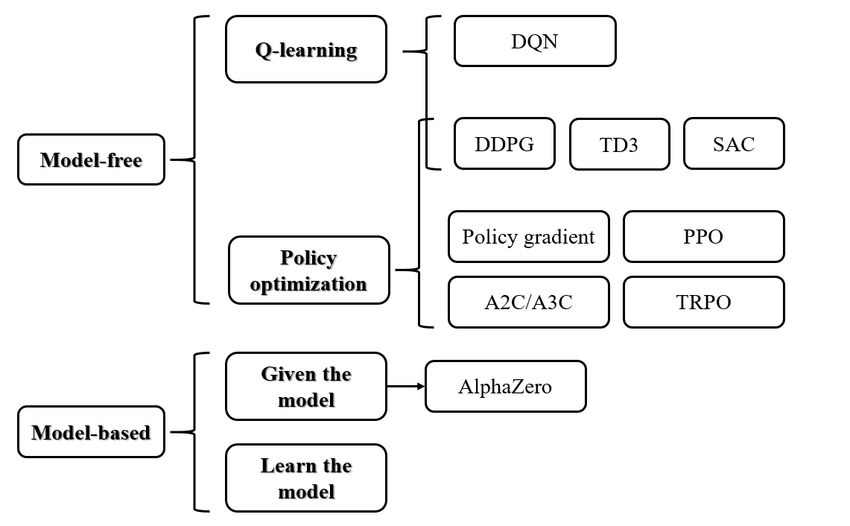

Q1) According given image, explain the value based, policy based apporches in MODEL FREE.

Q2) The DQN you implemented is consider which one of those? why? what is rule of the Policy Class you implemented?

Q3) Explain the rule of Replay Buffer in algorithm. (why we should use this?)

Q4) Explain the rule of epsilon

# Section Two

Section Two challenges you to implement the Soft Actor-Critic (SAC) algorithm, representing a significant shift from the value-based approach of DQN to a state-of-the-art actor-critic method. SAC belongs to the family of maximum entropy reinforcement learning algorithms, which explicitly balance reward maximization with maintaining stochastic policies for better exploration. Unlike DQN’s discrete action selection, SAC can naturally handle continuous action spaces while incorporating entropy regularization to encourage exploration and prevent premature convergence to suboptimal policies. You’ll need to architect multiple neural networks - an actor network that outputs actions, critic networks that evaluate state-action pairs, and potentially a value network depending on your implementation choice.

Implementing SAC requires understanding several advanced concepts including the reparameterization trick for gradient computation through stochastic nodes, soft value functions that incorporate entropy bonuses, and the careful orchestration of multiple function approximators. The algorithm’s elegance lies in its ability to automatically tune the temperature parameter that balances exploration and exploitation. As you build your implementation, consider how SAC differs fundamentally from DQN in its approach to the exploration-exploitation trade-off and its ability to maintain a stochastic policy throughout training. The comparison questions at the end will help you articulate these differences and understand when each algorithm might be preferred. Your implementation will again be tested on CartPole-v1, allowing direct comparison with your DQN results and highlighting the distinct characteristics of policy-based versus value-based methods.

### Implement SAC

Implement SAC with (Cart-pole) enviroment.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import matplotlib.pyplot as plt
import gymnasium as gym

#####################################################################
# TODO:
# 10) Implement whole SAC. you can inspire by DQN.
raise NotImplementedError(" No filter has implemented to the images")
#####################################################################

# Below is how you modules can be
# Feels free to adjsut as you like
for run in range(n_runs):
    print(f"Run {run+1}/{n_runs}")
    seed = 100 + run  
    env = gym.make('CartPole-v1')
    set_seed(seed, env)
    policy = Policy()
    value_net = ValueNetwork()
    optimizer_policy = optim.Adam(policy.parameters(), lr=1e-2)
    optimizer_value = optim.Adam(value_net.parameters(), lr=1e-2)
    scores = A2C(policy, value_net, env, optimizer_policy, optimizer_value, n_episodes=n_episodes)
    all_scores.append(scores)
    env.close()

all_scores = np.array(all_scores)
mean_scores = np.mean(all_scores, axis=0)
std_scores = np.std(all_scores, axis=0)
conf_interval = 1.96 * std_scores / np.sqrt(n_runs)

episodes = np.arange(1, n_episodes + 1)

plt.figure(figsize=(12, 7))
plt.plot(episodes, mean_scores, label='Mean Reward')
plt.fill_between(episodes, mean_scores - conf_interval, mean_scores + conf_interval, alpha=0.3, color='blue', label='95% Confidence Interval')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('A2C: CartPole-v1\nMean and 95% Confidence Interval over 5 runs')
plt.legend()
plt.grid(True)
plt.show()

Q1) Plot the average return with 5 different seed, mean and std.

Q2) Explain the SAC algorithm; what is different between SAC and DQN? 

Q3) According to the diagram which is given in the previous question, how is SAC categorized?


Q4) Explain each components in SAC, and functionality.